In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

## Importing data

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.shape

(9134, 24)

### 4.Rename the columns so they follow the PE8 (snake case).

In [6]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [7]:
## Converitng the headers in Lower case
customer_df.columns = map(str.lower,customer_df.columns)

In [8]:
## converting space with underscore
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [9]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 5.Change effective to date column to datetime format.

In [10]:
##data type
customer_df['effective_to_date'].dtypes

dtype('O')

In [11]:
## date time formting of effective to date column
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [12]:
##data type
customer_df['effective_to_date'].dtypes

dtype('<M8[ns]')

### 6.Check NaN values per column.

In [13]:
## Checking the total null values of each column
customer_df.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

### 7.Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [14]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [15]:
categoricals = customer_df.select_dtypes(np.object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [16]:
discrete = pd.DataFrame(customer_df,columns = ['customer_lifetime_value' , 'income' , 'monthly_premium_auto','number_of_policies','total_claim_amount'])
discrete.head()

,customer_lifetime_value,income,monthly_premium_auto,number_of_policies,total_claim_amount
0,2763.519279,56274,69,1,384.811147
1,6979.535903,0,94,8,1131.464935
2,12887.431650,48767,108,2,566.472247
3,7645.861827,0,106,7,529.881344
4,2813.692575,43836,73,1,138.130879


In [17]:
continious = pd.DataFrame(customer_df,columns = ['months_since_last_claim' , 'months_since_policy_inception' , 'effective_to_date'])
continious.head()

,months_since_last_claim,months_since_policy_inception,effective_to_date
0,32,5,2011-02-24
1,13,42,2011-01-31
2,18,38,2011-02-19
3,18,65,2011-01-20
4,12,44,2011-02-03


### 8.For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [18]:
## Checking the total null values of each column
categoricals.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

### 9.Get categorical features.

In [19]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [20]:
categoricals.shape

(9134, 15)

In [21]:
## correlation of continious and discrete values
continious.corr()

,months_since_last_claim,months_since_policy_inception
months_since_last_claim,1.000000,-0.042959
months_since_policy_inception,-0.042959,1.000000


In [22]:
discrete.corr()

,customer_lifetime_value,income,monthly_premium_auto,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,-0.011233,0.632017
number_of_policies,0.021955,-0.008656,-0.011233,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,-0.002354,1.000000


In [23]:
## plotting displot for discrete 

### Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [24]:
def graph_plot(x):
    if x in discrete.columns:
        return sns.distplot(discrete[x])
    else:
        return 

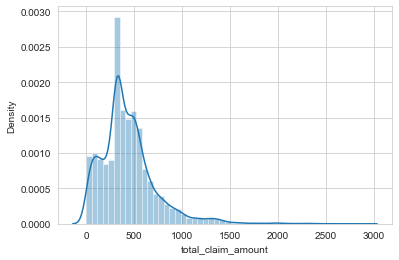

In [25]:
graph_plot('total_claim_amount')

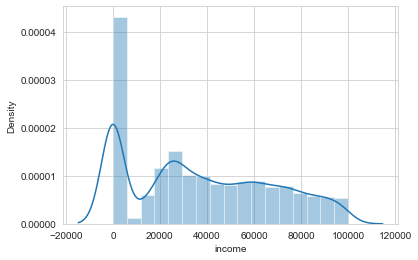

In [26]:
graph_plot('income')

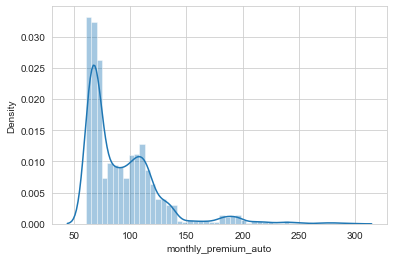

In [27]:
graph_plot('monthly_premium_auto')

### Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

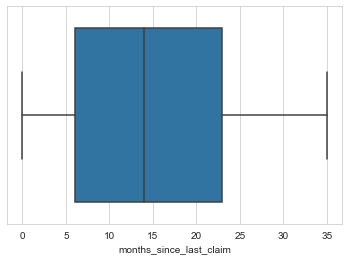

In [28]:
sns.boxplot(x=continious['months_since_last_claim'])

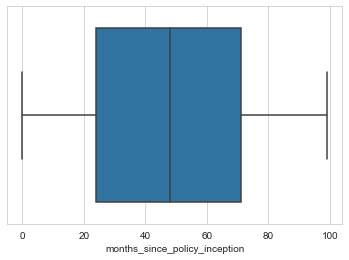

In [29]:
sns.boxplot(x=continious['months_since_policy_inception'])

In [30]:
### there are no outliers in the continuous variables

### 1.Open the categoricals variable we created before.

In [31]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [32]:
categoricals.shape

(9134, 15)

### 2.Plot all the categorical variables with the proper plot. What can you see?

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt



In [34]:
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [35]:
## dropped the customer column in the above step
categoricals = categoricals.drop('customer',axis = 1)

barplot for the column:  state


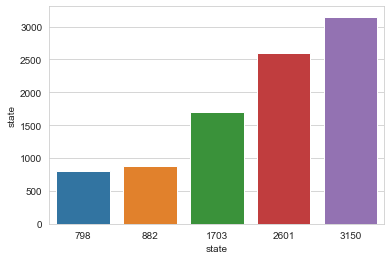

barplot for the column:  response


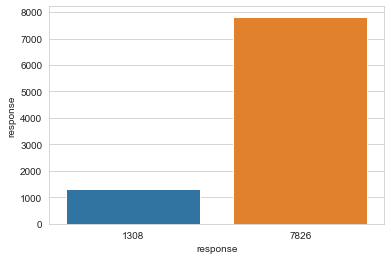

barplot for the column:  coverage


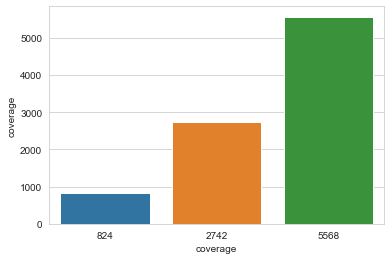

barplot for the column:  education


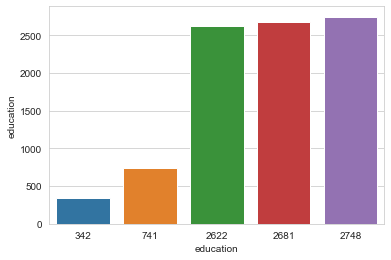

barplot for the column:  employmentstatus


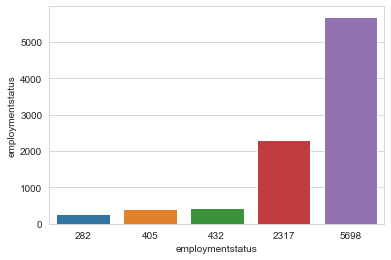

barplot for the column:  gender


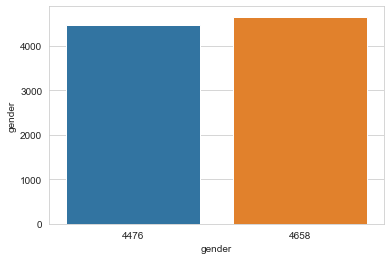

barplot for the column:  location_code


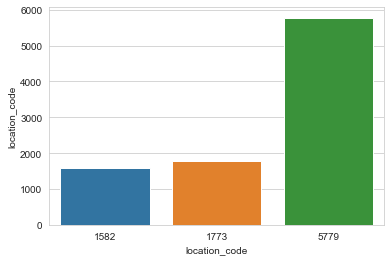

barplot for the column:  marital_status


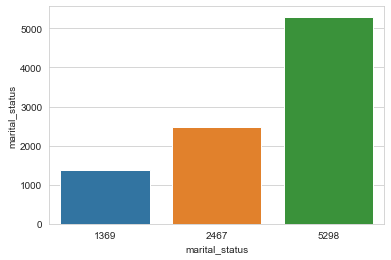

barplot for the column:  policy_type


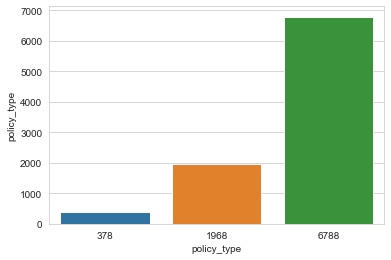

barplot for the column:  policy


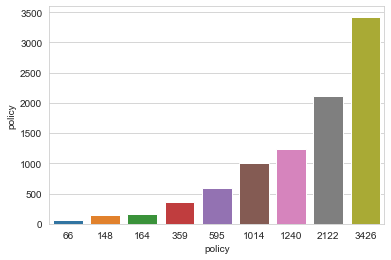

barplot for the column:  renew_offer_type


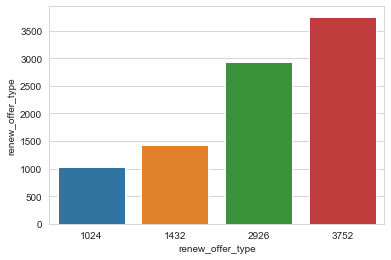

barplot for the column:  sales_channel


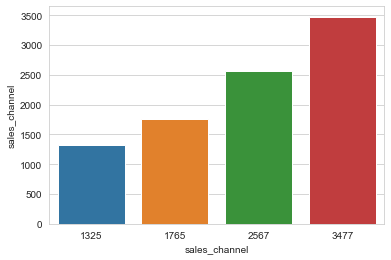

barplot for the column:  vehicle_class


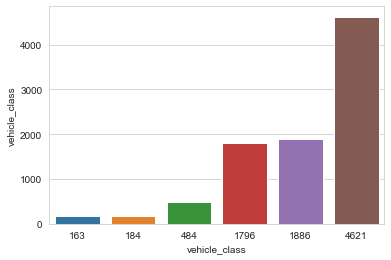

barplot for the column:  vehicle_size


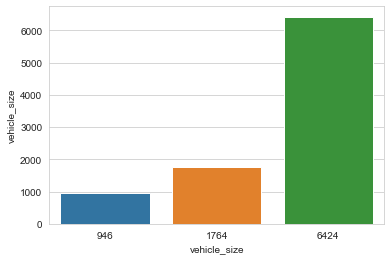

In [36]:
for i in categoricals:
    mydata = categoricals[i].value_counts()
    print("barplot for the column: ",i)
    sns.barplot(x = mydata,y = mydata.index,data = mydata)
    plt.show()

### 3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [37]:
## dropped the customer column in the above step

### 4.Plot time variable. Can you extract something from it?

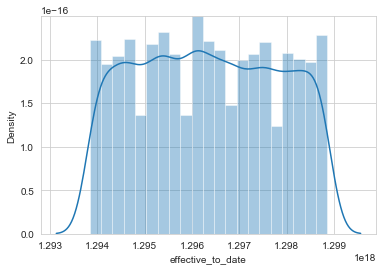

In [38]:
## plot for time variable
sns.distplot(continious['effective_to_date'])
plt.show()

# Data cleaning and wrangling

### Normalize the continuous variables. You can use any one method you want.

In [39]:
continious.head()

,months_since_last_claim,months_since_policy_inception,effective_to_date
0,32,5,2011-02-24
1,13,42,2011-01-31
2,18,38,2011-02-19
3,18,65,2011-01-20
4,12,44,2011-02-03


In [40]:
## creating new variable without effective to date in it
continious_new = continious.drop('effective_to_date',axis = 1)
continious_new.head()

,months_since_last_claim,months_since_policy_inception
0,32,5
1,13,42
2,18,38
3,18,65
4,12,44


In [41]:
## Normalizing the new continious variables

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(continious_new)
x_normalized = transformer.transform(continious_new)
x_normalized

array([[0.98801203, 0.15437688],
       [0.29568373, 0.95528589],
       [0.42808634, 0.90373784],
       ...,
       [0.23635158, 0.9716676 ],
       [0.99612985, 0.08789381],
       [0.03331483, 0.99944491]])

### Encode the categorical variables

In [42]:
categoricals.shape

(9134, 14)

In [43]:
cat = categoricals.columns

x = [j for i in cat for j in categoricals[i].unique()[1:]]


In [44]:
### ONE HOT ENCODING for categorical data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()
cat_data = pd.DataFrame(encoded , columns = x)
cat_data.head()

,Arizona,Nevada,California,Oregon,Yes,Extended,Premium,College,Master,High School or Below,Doctor,Unemployed,Medical Leave,Disabled,Retired,M,Rural,Urban,Single,Divorced,Personal Auto,Special Auto,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Offer3,Offer2,Offer4,Call Center,Web,Branch,Four-Door Car,SUV,Luxury SUV,Sports Car,Luxury Car,Small,Large
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [45]:
continious['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [46]:
## year extracted from the effective date
print("\nYear:")
print(continious['effective_to_date'].dt.year.head())


Year:
0    2011
1    2011
2    2011
3    2011
4    2011
Name: effective_to_date, dtype: int64


In [47]:
## month extracted from the effective date
print("\nMonth:")
print(continious['effective_to_date'].dt.month.head())


Month:
0    2
1    1
2    2
3    1
4    2
Name: effective_to_date, dtype: int64


In [48]:
## Days extracted from the effective date
print("\nDay:")
print(continious['effective_to_date'].dt.day.head())


Day:
0    24
1    31
2    19
3    20
4     3
Name: effective_to_date, dtype: int64


In [49]:
max(continious['effective_to_date'])

Timestamp('2011-02-28 00:00:00')

In [50]:
min(continious['effective_to_date'])

Timestamp('2011-01-01 00:00:00')

In [51]:
## days of week extracted from the effective date
s = pd.date_range('2011-01-01','2011-02-28', freq='D').to_series()
s.dt.dayofweek.head()

2011-01-01    5
2011-01-02    6
2011-01-03    0
2011-01-04    1
2011-01-05    2
Freq: D, dtype: int64

### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [52]:
## cat_data - categorical data changed to binary
## continious - contious variables
## discrete - discrete variables


In [53]:
### creating data frames to concat
continious['day'] = pd.DataFrame(continious['effective_to_date'].dt.day)
continious['month'] = pd.DataFrame(continious['effective_to_date'].dt.month)
continious['year'] = pd.DataFrame(continious['effective_to_date'].dt.year)
continious['dayofweek'] = pd.DataFrame(continious['effective_to_date'].dt.dayofweek)

In [54]:
## concating everything in one data frame
data_new=pd.concat([cat_data,continious,discrete],axis=1,join='outer')
data_new.head()

,Arizona,Nevada,California,Oregon,Yes,Extended,Premium,College,Master,High School or Below,Doctor,Unemployed,Medical Leave,Disabled,Retired,M,Rural,Urban,Single,Divorced,Personal Auto,Special Auto,Personal L3,Corporate L2,Personal L1,Special L2,Corporate L1,Personal L2,Special L1,Special L3,Offer3,Offer2,Offer4,Call Center,Web,Branch,Four-Door Car,SUV,Luxury SUV,Sports Car,Luxury Car,Small,Large,months_since_last_claim,months_since_policy_inception,effective_to_date,day,month,year,dayofweek,customer_lifetime_value,income,monthly_premium_auto,number_of_policies,total_claim_amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,32,5,2011-02-24,24,2,2011,3,2763.519279,56274,69,1,384.811147
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13,42,2011-01-31,31,1,2011,0,6979.535903,0,94,8,1131.464935
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,18,38,2011-02-19,19,2,2011,5,12887.431650,48767,108,2,566.472247
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,18,65,2011-01-20,20,1,2011,3,7645.861827,0,106,7,529.881344
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12,44,2011-02-03,3,2,2011,3,2813.692575,43836,73,1,138.130879


In [83]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Arizona                        9134 non-null   float64       
 1   Nevada                         9134 non-null   float64       
 2   California                     9134 non-null   float64       
 3   Oregon                         9134 non-null   float64       
 4   Yes                            9134 non-null   float64       
 5   Extended                       9134 non-null   float64       
 6   Premium                        9134 non-null   float64       
 7   College                        9134 non-null   float64       
 8   Master                         9134 non-null   float64       
 9   High School or Below           9134 non-null   float64       
 10  Doctor                         9134 non-null   float64       
 11  Unemployed       

In [87]:
data_new = data_new.drop('effective_to_date',axis = 1)

### Train_Test_split

In [88]:
## Assigning varibales X and Y
X = data_new.drop('total_claim_amount',axis = 1)
y = data_new['total_claim_amount']


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## LINEAR REGRESSION

In [90]:
from sklearn import linear_model

from sklearn.linear_model import LinearRegression

In [91]:
lm = linear_model.LinearRegression()

lm_model = lm.fit(X_train,y_train)

In [92]:
lm_predictions = lm_model.predict(X_test)

In [93]:
MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:  94.28
The mean squared error of the model in the test set is: 17787.85
The root mean squared error of the model in the test set is: 133.37
The R2 of the model in the test set is: 0.78


### Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [110]:
models = [LinearRegression(),KNeighborsRegressor()]

In [123]:
def user_fuction(models):
    for model in models:
        model.fit(X_train, y_train)
        e = model.predict(X_test)
        MAE =  mean_absolute_error(y_test,e)
        MSE = mean_squared_error(y_test,e)
        RMSE = np.sqrt(MSE)
        R2 = r2_score(y_test,e)
        print (model)
        print(model.score(X_train, y_train),model.score(X_test, y_test))
        print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
        print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
        print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
        print("The R2 of the model in the test set is: %4.2f" % (R2))
        

In [124]:
user_fuction([LinearRegression()])

LinearRegression()
0.7696655032107479 0.7771896380344899
The mean absolute error of the model in the test set is:  94.28
The mean squared error of the model in the test set is: 17787.85
The root mean squared error of the model in the test set is: 133.37
The R2 of the model in the test set is: 0.78


In [125]:
user_fuction([KNeighborsRegressor()])

KNeighborsRegressor()
0.5234546936417784 0.1973778735033318
The mean absolute error of the model in the test set is: 175.37
The mean squared error of the model in the test set is: 64076.55
The root mean squared error of the model in the test set is: 253.13
The R2 of the model in the test set is: 0.20


## Training the K-NN model

In [94]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [95]:
knn_predictions = knn_model.predict(X_test)

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 174.58
The mean squared error of the model in the test set is: 64414.58
The root mean squared error of the model in the test set is: 253.80
The R2 of the model in the test set is: 0.19


In [ ]:
## taking different R2 values for K-NN models

In [98]:
scores = []## we will store each  R2 values for each K-NN models with different values
for i in range(2,10): # The values of K.
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'R2')

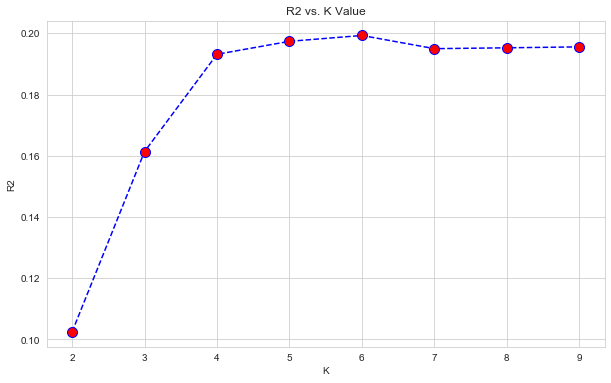

In [99]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')



## MLPRegressor

In [126]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [108]:
mlpr = [MLPRegressor(max_iter = 1000)]
models_automation([mlpr], X_train, y_train)


NameError: name 'models_automation' is not defined

In [102]:
mlp_predictions = mlp_model.predict(X_test)

In [103]:
MAE = mean_absolute_error(y_test,mlp_predictions)
MSE = mean_squared_error(y_test,mlp_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,mlp_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 174.58
The mean squared error of the model in the test set is: 64414.58
The root mean squared error of the model in the test set is: 253.80
The R2 of the model in the test set is: 0.19
